# Übung 03 - NaiveBayes zur Spam-Klassifikaton

### <span style="color:CornflowerBlue">Speichern Sie die Übung in dem Ordner 04-Uebung in Ihrem Git.</span>
In dieser Übung werden Sie einen Klassifikator implementieren, der in der Lage ist, Spam-Nachrichten in den Kommentaren eines Shakira-Musikvideos auf YouTube zu erkennen. Dazu müssen Sie zunächst den gegebenen Datensatz von Kommentaren in die Bag-of-Words-Darstellung konvertieren. Anschließend implementieren Sie einen Multinominal-Bayes-Klassifikator mit Laplace-Smoothing, um die Spam-Nachrichten in den Kommentaren zu erkennen.

Datenquelle: [https://archive-beta.ics.uci.edu/dataset/380/youtube+spam+collection](https://archive-beta.ics.uci.edu/dataset/380/youtube+spam+collection)


In [86]:
# importieren der Bibliotheken
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# plots direkt im notebook anzeigen
%matplotlib inline

## Aufgabe 1
a) Lesen Sie den Datensatz ein und entfernen Sie, falls notwendig, fehlerhafte Einträge.

In [87]:
df = pd.read_csv("Youtube05-Shakira.csv")
df.dropna()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


b) Teilen Sie die Daten in Merkmale (Features) und die Zielvariable auf. Wählen Sie dazu die Spalten mit den Kommentaren und die Spalte mit den Klassenlabeln aus. Die Kommentare sind folgendermaßen in Klassen unterteilt: kein Spam (0) und Spam(1).

In [88]:
features = df["CONTENT"]
zielvariable = df["CLASS"]

c) Unterteilen Sie die Daten in Trainings- und Testdaten.

In [89]:
features_train, features_test, ziel_train, ziel_test = train_test_split(features, zielvariable, test_size=0.3, random_state=2)

## Aufgabe 2
Wandeln Sie die Merkmale der Trainings- und Testdaten in die Bag-of-Words Darstellung um. 

**Tip 1:** CountVectorizer aus sklearn mit dem Parameter: binary=False

**Tip 2:** toarray() wandelt den Rückgabewert in ein 2D-Array um.

In [90]:
vectorizer = CountVectorizer(binary=False)
f_train_transformed = vectorizer.fit_transform(features_train)
f_train_arr = f_train_transformed.toarray()
f_test_transformed = vectorizer.transform(features_test)
f_test_arr = f_test_transformed.toarray()
print(f_train_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Aufgabe 3
Implementieren Sie den Multinominal Naive-Bayes Algorithmus mit add-1 Smoothing in der vorgegebenen Klasse.


<span style="color:red">**Verwenden Sie nicht die Klassifikatoren aus sklearn!**</span>

In [91]:
class NaiveBayes:

    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.priorPos = 0
        self.prioNeg = 0
        self.likelihoodPos = None
        self.likelihoodNeg = None

    def fit(self, X, y):
        self.priorPos = sum(y == 1) / len(y)
        self.priorNeg = sum(y == 0) / len(y)

        self.likelihoodPos = X[y==1]
        self.likelihoodNeg = X[y==0]


        self.likelihoodSumPos = np.sum(self.likelihoodPos, axis=0)
        self.likelihoodSumNeg = np.sum(self.likelihoodNeg, axis=0)

        likelihodSmoothPos = self.likelihoodSumPos + self.alpha
        likelihodSmoothNeg = self.likelihoodSumNeg + self.alpha

        self.likelihoodPos = likelihodSmoothPos * (1/(sum(self.likelihoodSumPos) + self.likelihoodSumPos.shape[0]))
        self.likelihoodNeg = likelihodSmoothNeg * (1/(sum(self.likelihoodSumNeg) + self.likelihoodSumNeg.shape[0]))


    def predict(self, X):
        result = []
        for x in X:
            pos = self.priorPos * np.prod(self.likelihoodPos ** x)
            neg = self.priorNeg * np.prod(self.likelihoodNeg ** x)

            if pos < neg:
                result.append(0)
            else:
                result.append(1)
        return result


b) Testen Sie die Implementierung auf den Testdaten.

* Geben Sie die Genauigkeit (accuracy) auf den Testdaten aus.
* Geben Sie die Konfusionsmatrix aus.

Genauigkeit auf den Testdaten: 0.9099099099099099


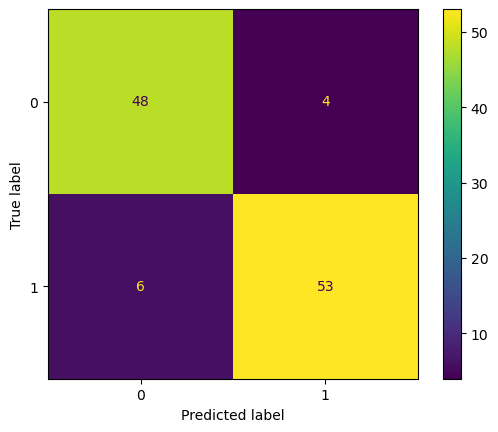

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Vorhersagen für die Testdaten machen
nb = NaiveBayes()
nb.fit(f_train_arr, ziel_train)
predictions = nb.predict(f_test_arr)

# Genauigkeit berechnen
accuracy = accuracy_score(ziel_test, predictions)
print("Genauigkeit auf den Testdaten:", accuracy)

# Konfusionsmatrix berechnen und ausgeben
conf_matrix = confusion_matrix(ziel_test, predictions)
d = ConfusionMatrixDisplay(confusion_matrix= conf_matrix)
d.plot()
plt.show()

**Hinweis:** Vergleichen mit sklearn.naive_bayes.MultinominalNB. 
Das Ergebnis sollte identisch sein.

Genauigkeit auf den Testdaten: 0.9099099099099099


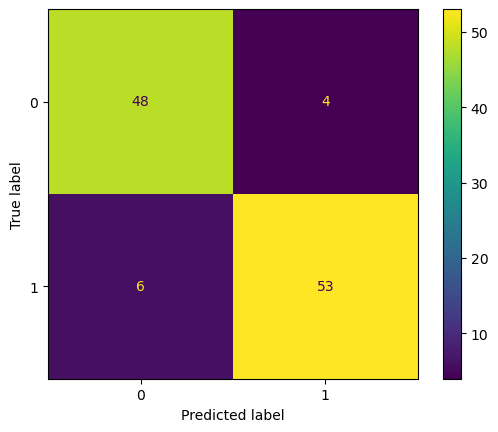

In [93]:
from sklearn.naive_bayes import MultinomialNB
klasse = MultinomialNB()
klasse.fit(f_train_arr, ziel_train)
var = klasse.predict(f_test_arr)
predictions = klasse.predict(f_test_arr)

# Genauigkeit berechnen
accuracy = accuracy_score(ziel_test, predictions)
print("Genauigkeit auf den Testdaten:", accuracy)

# Konfusionsmatrix berechnen und ausgeben
conf_matrix = confusion_matrix(ziel_test, predictions)
conf_matrix = confusion_matrix(ziel_test, predictions)
d = ConfusionMatrixDisplay(confusion_matrix= conf_matrix)
d.plot()
plt.show()